<a href="https://colab.research.google.com/github/hyunsoo0821/-1-4-/blob/main/%EC%9D%B4%EC%8A%A4%ED%8A%B8%EC%86%8C%ED%94%84%ED%8A%B8_%EC%8B%9D%EB%A3%8C%ED%92%88%2C_%EC%8B%9D%EB%A3%8C%ED%92%88%EB%B0%8F_%EB%B9%84%EC%A3%BC%EB%A5%98%EC%9D%8C%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('소비자물가지수_26092718.csv',encoding="utf-8")

/tmp/ipython-input-1569326527.py:2: DtypeWarning: Columns (185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,4

In [ ]:
# 원하는 계정항목과 변환 항목
target_codes = ["식료품", "식료품 및 비주류음료"]
target_transform = ["전년말대비증감", "전년말대비증감률", "원자료", "이동평균(3기간)"]

# 공백 제거 후 계정항목 정리
df["계정항목_정리"] = df["계정항목"].str.strip()

# 날짜 컬럼 추출
start_date = pd.to_datetime("1965/01")
end_date = pd.to_datetime("2025/07")
date_cols = []
for col in df.columns:
    try:
        col_date = pd.to_datetime(col, format="%Y/%m", errors="raise")
        if start_date <= col_date <= end_date:
            date_cols.append(col)
    except:
        continue

# 전체 필터링
filtered_df = df[
    (df["변환"].isin(target_transform)) &
    (df["계정항목_정리"].isin(target_codes))
][["변환", "계정항목_정리"] + date_cols]
# 전년말대비증감률
rate_df = filtered_df[filtered_df["변환"] == "전년말대비증감률"]

# 원자료
raw_df = filtered_df[filtered_df["변환"] == "원자료"]

# 이동평균(3기간)
ma_df = filtered_df[filtered_df["변환"] == "이동평균(3기간)"]

# 출력 확인
print("전년말대비증감률\n", rate_df)
print("원자료\n", raw_df)
print("이동평균(3기간)\n", ma_df)



▶ 전년말대비증감률
           변환      계정항목_정리  1965/01  1965/02  1965/03  1965/04  1965/05  \
14  전년말대비증감률  식료품 및 비주류음료      NaN      NaN      NaN      NaN      NaN   
22  전년말대비증감률          식료품      NaN      NaN      NaN      NaN      NaN   

    1965/06  1965/07  1965/08  ...  2024/10  2024/11  2024/12  2025/01  \
14      NaN      NaN      NaN  ...      3.3      0.6      2.5      1.2   
22      NaN      NaN      NaN  ...      3.4      0.5      2.4      1.2   

    2025/02  2025/03  2025/04  2025/05  2025/06  2025/07  
14      2.3      3.0      2.3      0.9      0.9      1.7  
22      2.4      3.0      2.4      1.0      0.8      1.6  

[2 rows x 729 columns]
▶ 원자료
      변환      계정항목_정리  1965/01  1965/02  1965/03  1965/04  1965/05  1965/06  \
8   원자료  식료품 및 비주류음료      NaN      NaN      NaN      NaN      NaN      NaN   
16  원자료          식료품      NaN      NaN      NaN      NaN      NaN      NaN   

    1965/07  1965/08  ...  2024/10  2024/11  2024/12  2025/01  2025/02  \
8       NaN      NaN  ...

In [ ]:
filtered_df = df[
    df['변환'].isin(['전년말대비증감률', '원자료', '이동평균(3기간)']) &
    df['계정항목'].isin(['식료품', '식료품 및 비주류음료'])
].copy()

growth_df = filtered_df.groupby('계정항목')[date_cols].mean()
growth_df['Growth_CAGR'] = growth_df.mean(axis=1)


/tmp/ipython-input-4175911520.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  growth_df['Growth_CAGR'] = growth_df.mean(axis=1)


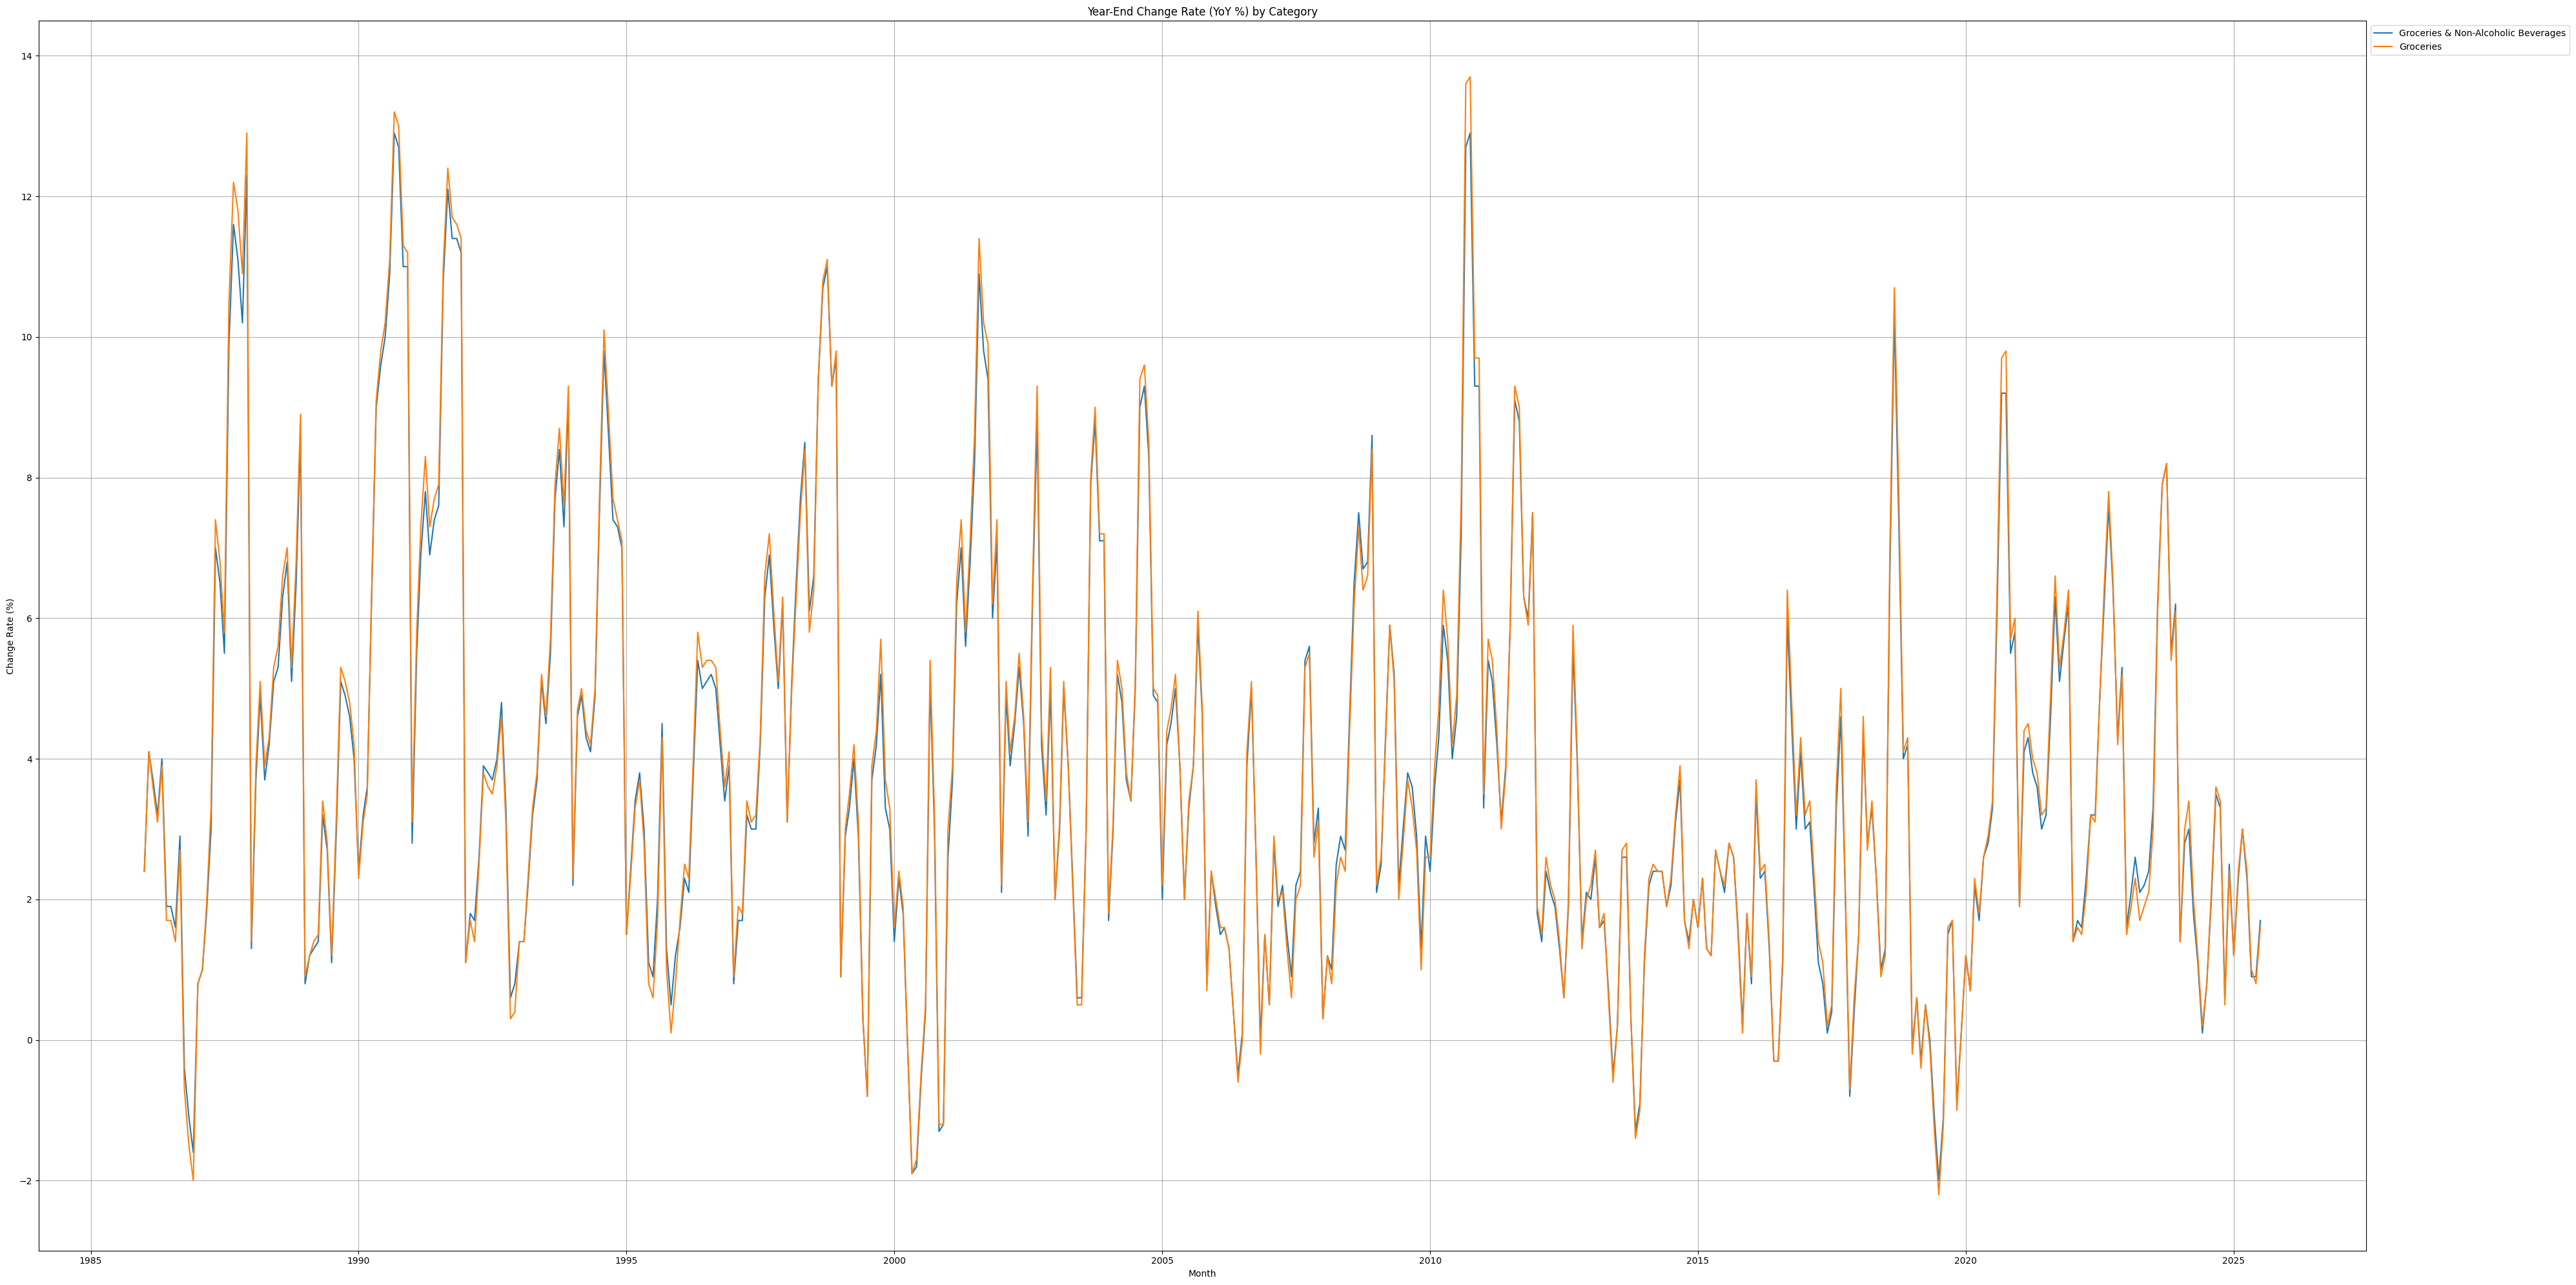

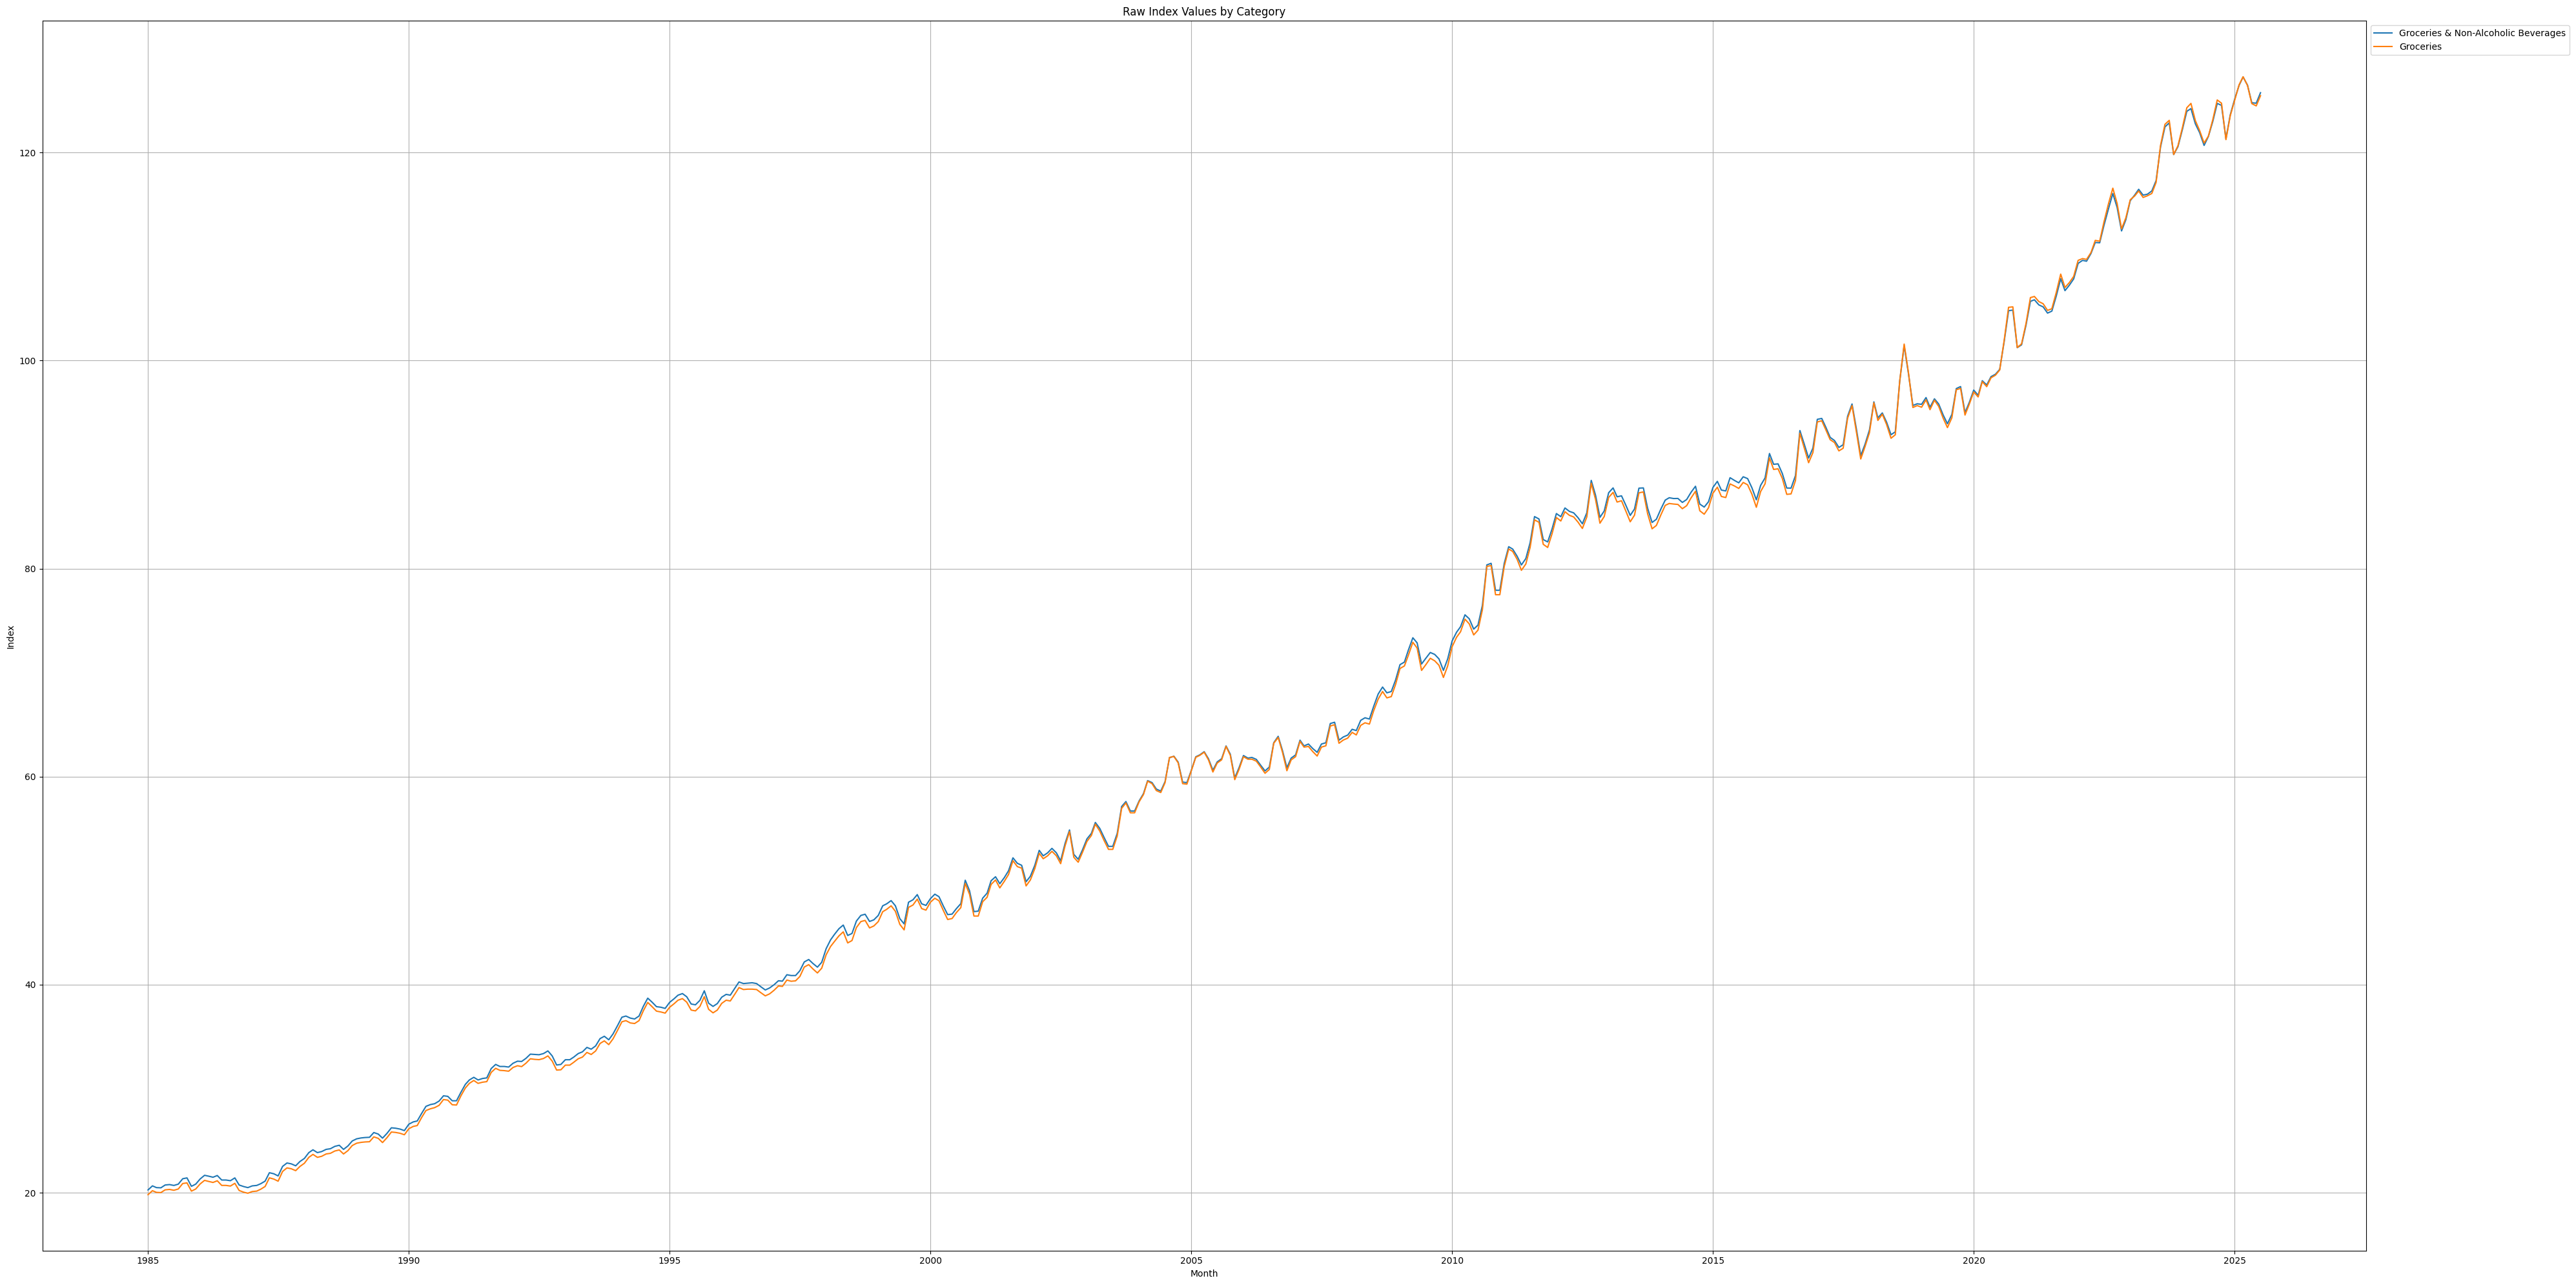

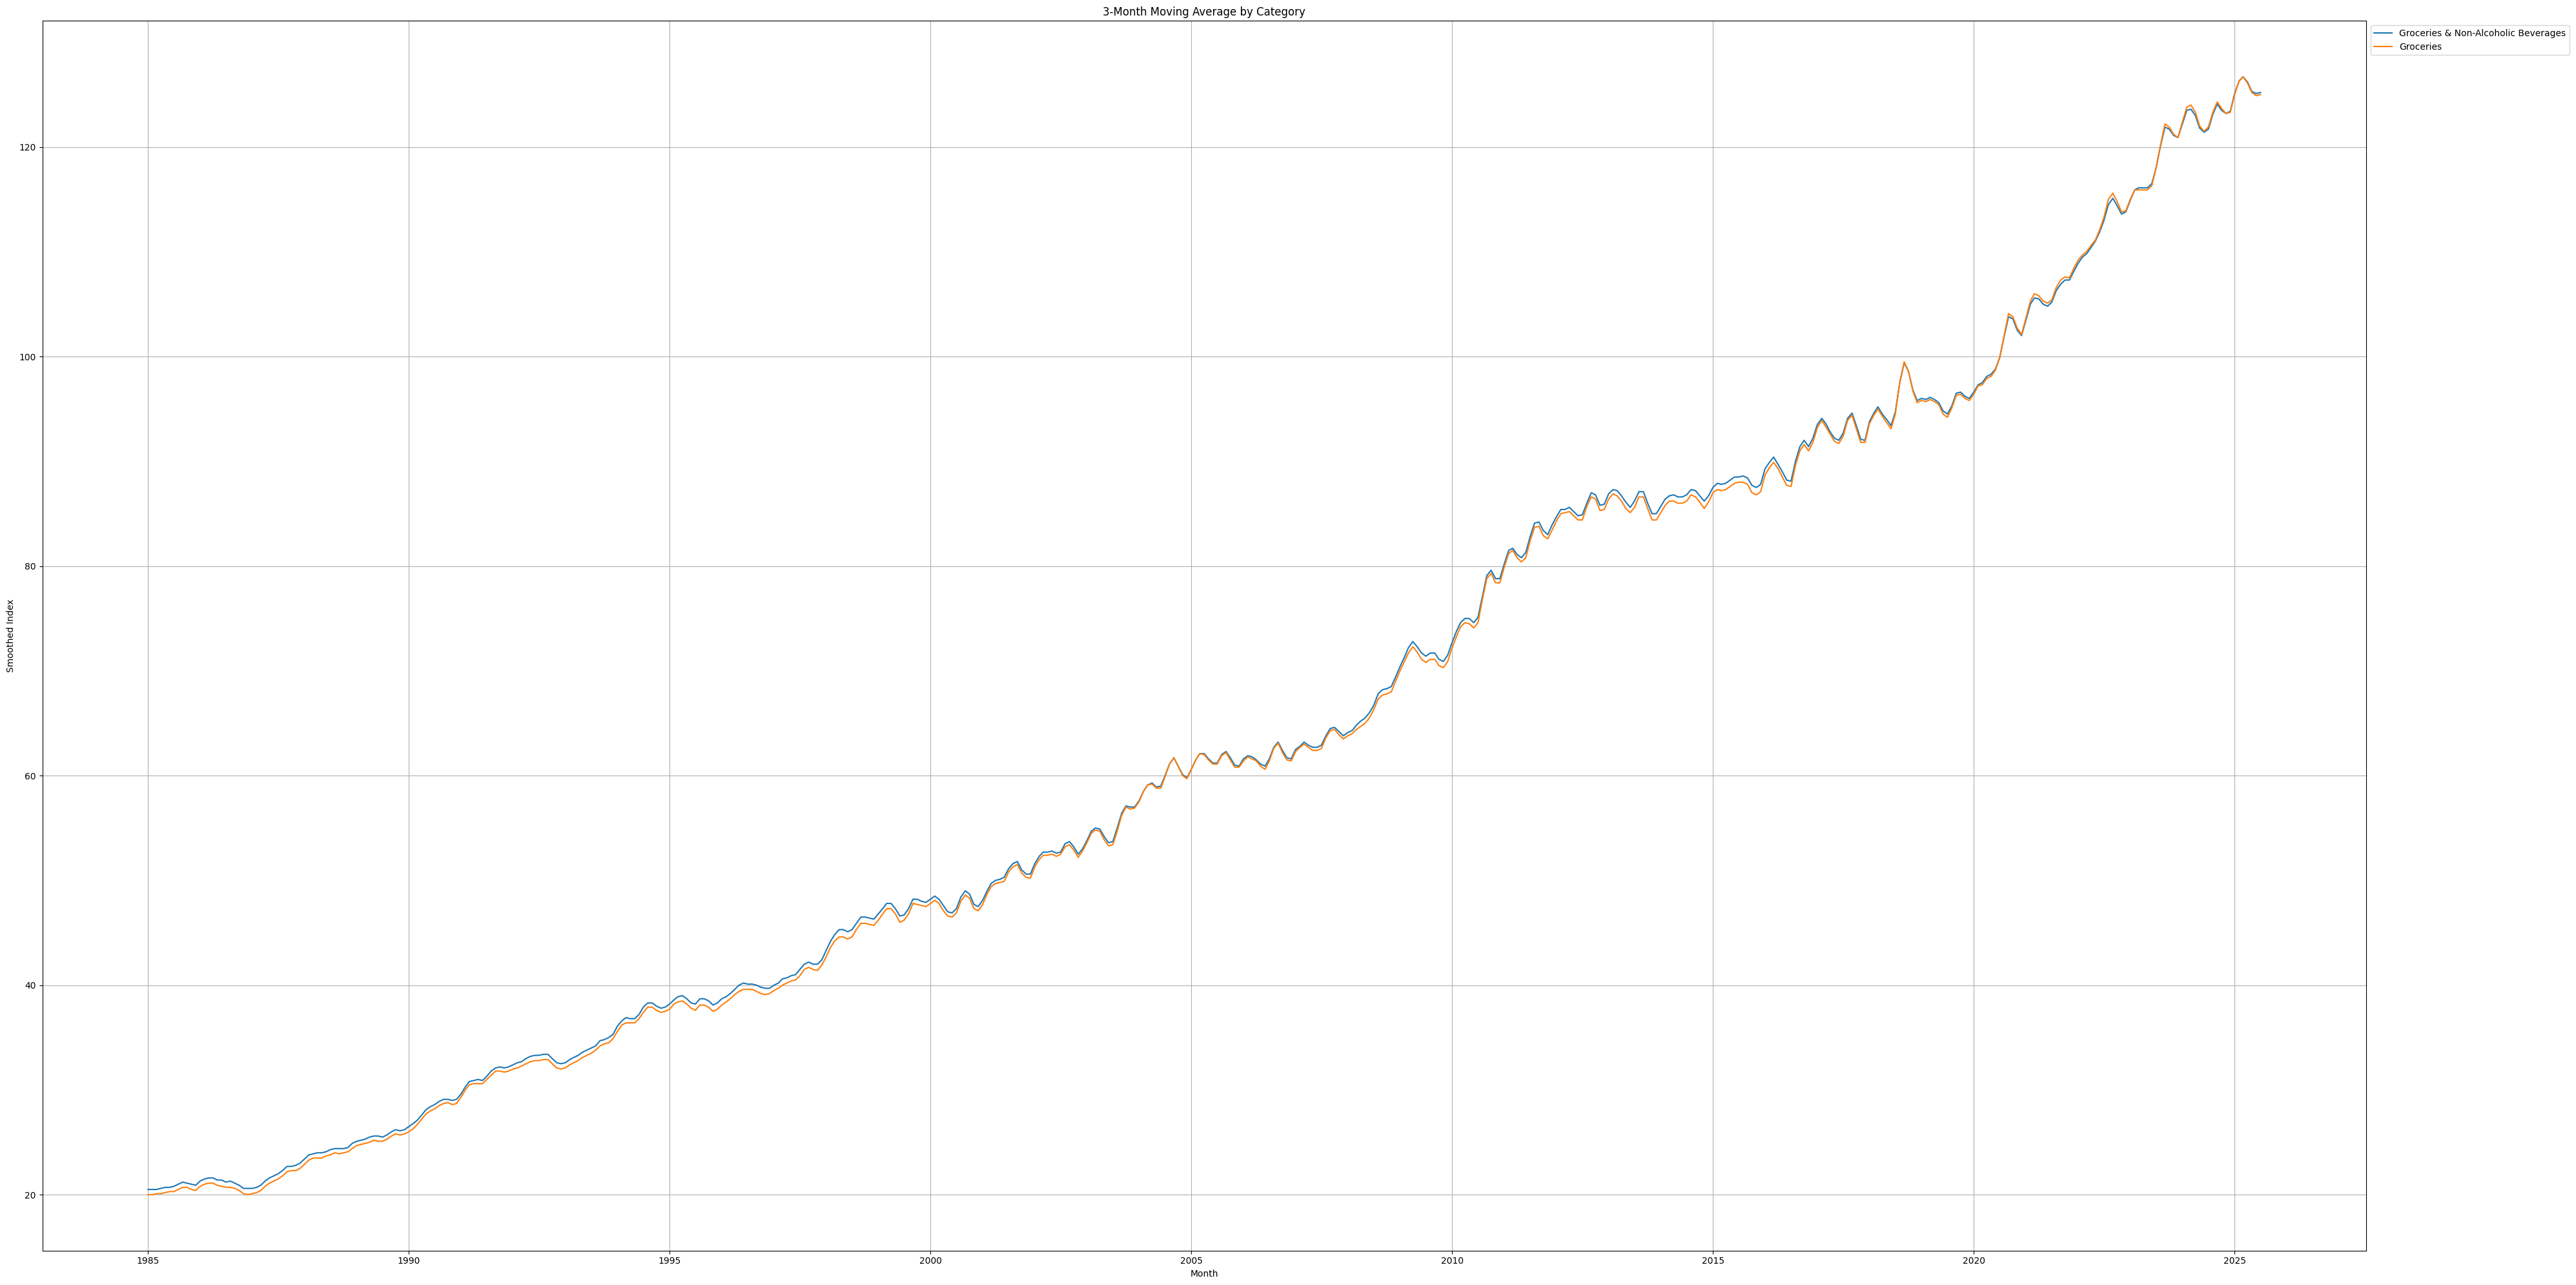

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 🗂️ 계정항목 매핑 딕셔너리
category_mapping = {
    "식료품": "Groceries",
    "식료품 및 비주류음료": "Groceries & Non-Alcoholic Beverages"
}

# 📅 날짜 컬럼 추출
date_cols = [col for col in df.columns if '/' in col]
dates = pd.to_datetime(date_cols, format='%Y/%m')

# 🧼 숫자 변환 함수 + NaN 제거
def clean_numeric(df):
    df[date_cols] = df[date_cols].apply(pd.to_numeric, errors='coerce')
    return df.dropna(how='all', subset=date_cols)

# 🔍 변환별 필터링 함수
def get_transformed_df(df, 변환명):
    temp = df[df['변환'] == 변환명].copy()
    temp['계정항목_영문'] = temp['계정항목_정리'].map(category_mapping)
    temp = temp[temp['계정항목_영문'].notna()]
    temp = clean_numeric(temp)
    return temp.set_index('계정항목_영문')

# 📊 시각화 함수
def plot_series(df, title, ylabel):
    plt.figure(figsize=(40, 20))
    for label, row in df.iterrows():
        plt.plot(dates, row[date_cols], label=label)
    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel(ylabel)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📁 각 변환 유형별 데이터 준비
yoy_df = get_transformed_df(df, '전년말대비증감률')
raw_df = get_transformed_df(df, '원자료')
ma3_df = get_transformed_df(df, '이동평균(3기간)')

# 📈 시각화 실행
plot_series(yoy_df, "Year-End Change Rate (YoY %) by Category", "Change Rate (%)")
plot_series(raw_df, "Raw Index Values by Category", "Index")
plot_series(ma3_df, "3-Month Moving Average by Category", "Smoothed Index")



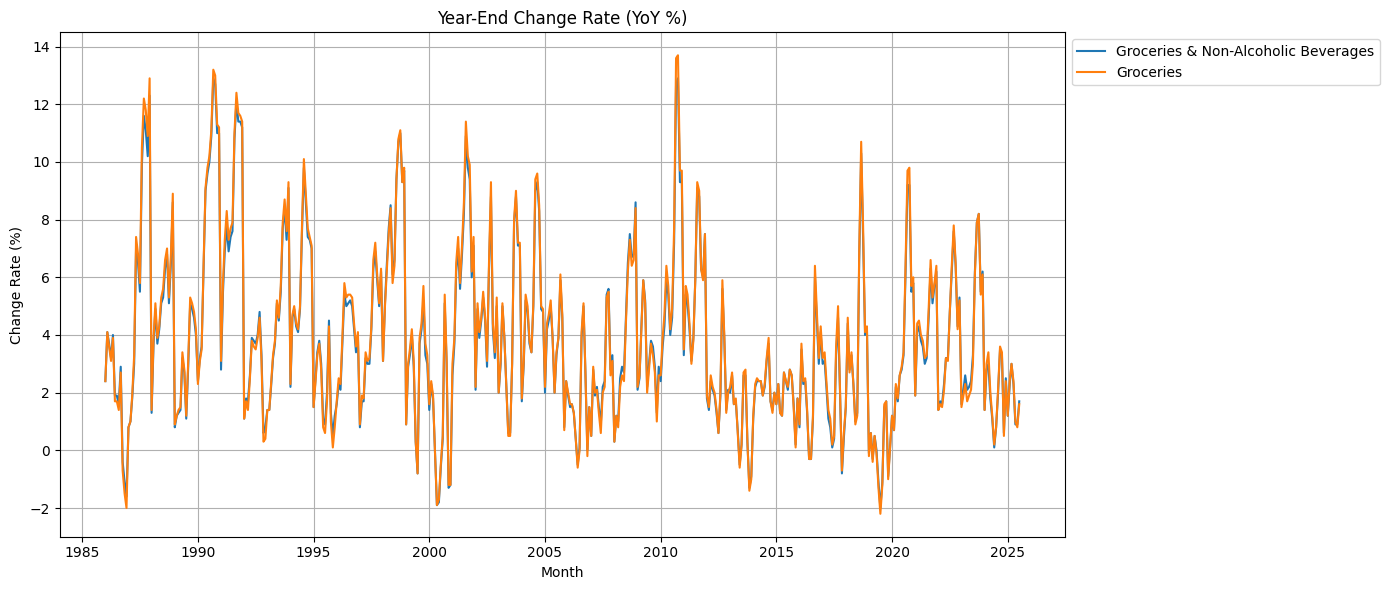

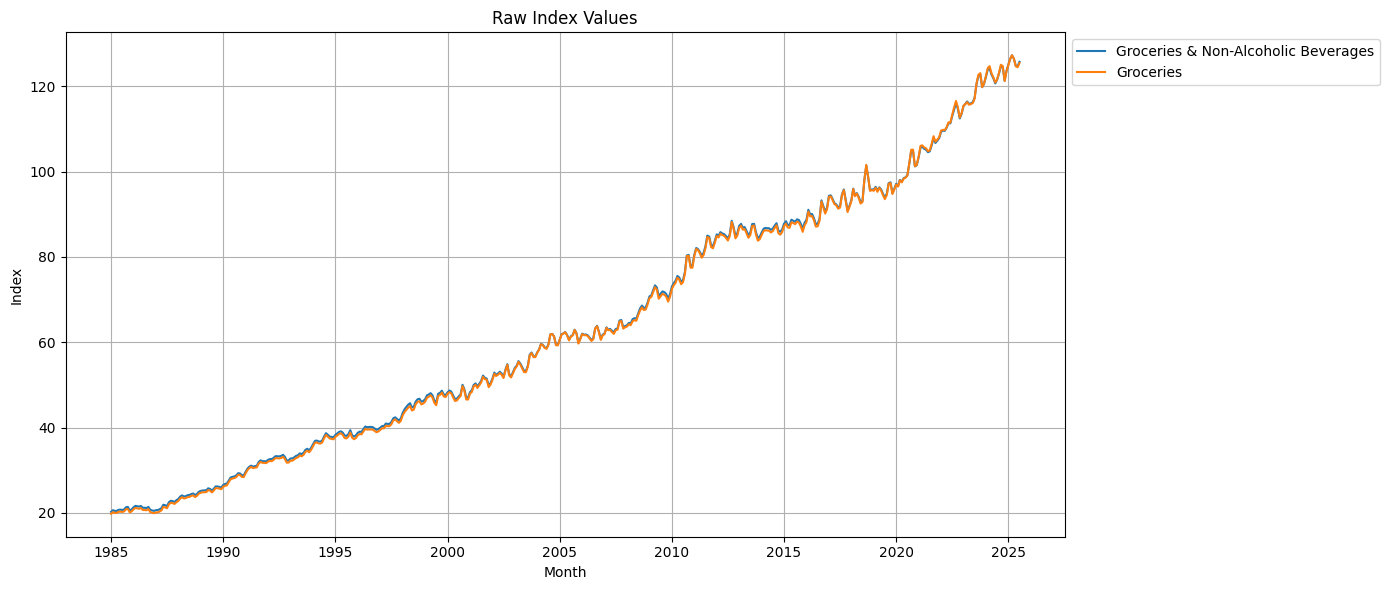

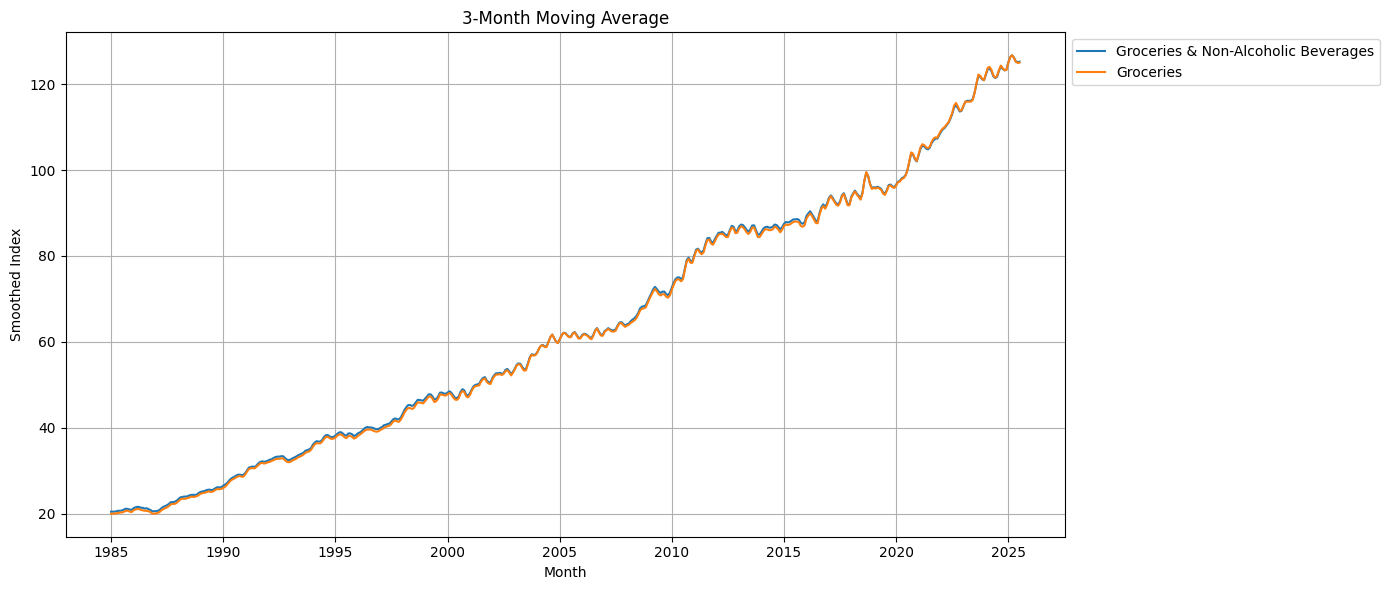

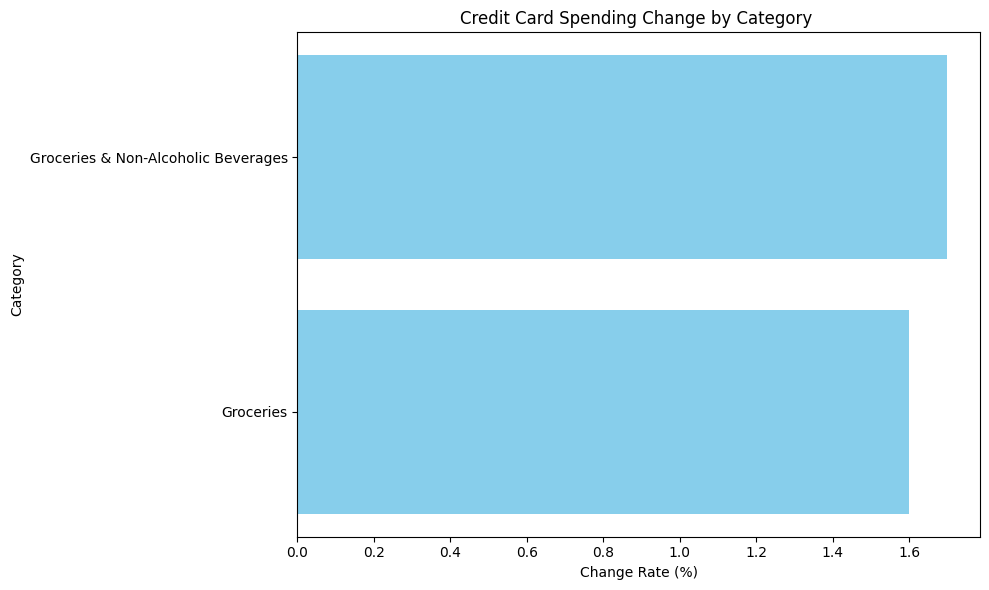

In [ ]:
tart_date = pd.to_datetime("1965/01")
end_date = pd.to_datetime("2025/07")
date_cols = [col for col in df.columns if '/' in col and start_date <= pd.to_datetime(col, format="%Y/%m") <= end_date]
dates = pd.to_datetime(date_cols, format='%Y/%m')

# 🧼 숫자 변환 함수 + NaN 제거
def clean_numeric(df):
    df[date_cols] = df[date_cols].apply(pd.to_numeric, errors='coerce')
    return df.dropna(how='all', subset=date_cols)

# 🔍 변환별 필터링 함수
def get_transformed_df(df, 변환명):
    temp = df[
        (df["변환"] == 변환명) &
        (df["계정항목_정리"].isin(target_codes))
    ].copy()
    temp['계정항목_영문'] = temp['계정항목_정리'].map(category_mapping)
    temp = temp[temp['계정항목_영문'].notna()]
    temp = clean_numeric(temp)
    return temp.set_index('계정항목_영문')


# 📁 각 변환 유형별 데이터 준비 및 시각화
for 변환명, title, ylabel in [
    ("전년말대비증감률", "Year-End Change Rate (YoY %)", "Change Rate (%)"),
    ("원자료", "Raw Index Values", "Index"),
    ("이동평균(3기간)", "3-Month Moving Average", "Smoothed Index")
]:
    df_transformed = get_transformed_df(df, 변환명)
    plot_series(df_transformed, title, ylabel)

# 📊 최신 월 막대 그래프
latest_month = '2025/07'
bar_df = get_transformed_df(df, '전년말대비증감률').reset_index()[['계정항목_영문', latest_month]].dropna()
bar_df[latest_month] = pd.to_numeric(bar_df[latest_month], errors='coerce')
bar_df = bar_df.sort_values(by=latest_month, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(bar_df['계정항목_영문'], bar_df[latest_month], color='skyblue')
plt.title(f"Credit Card Spending Change by Category ")
plt.xlabel("Change Rate (%)")
plt.ylabel("Category")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# 대상 소비유형
target_categories = ["식료품", "식료품 및 비주류음료"]

# 변환별 데이터 준비
yoy_df = df[(df['변환'] == '전년말대비증감률') & (df['계정항목_정리'].isin(target_categories))].copy()
raw_df = df[(df['변환'] == '원자료') & (df['계정항목_정리'].isin(target_categories))].copy()
ma_df  = df[(df['변환'] == '이동평균(3기간)') & (df['계정항목_정리'].isin(target_categories))].copy()

# 날짜 컬럼 정리
date_cols = [col for col in df.columns if '/' in col]


In [ ]:
ma_df[date_cols] = ma_df[date_cols].apply(pd.to_numeric, errors='coerce')
ma_df['Stability_STD'] = ma_df[date_cols].std(axis=1)
ma_df['Stability_Score'] = 1 / (ma_df['Stability_STD'] + 1e-6)


/tmp/ipython-input-2963415284.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ma_df['Stability_STD'] = ma_df[date_cols].std(axis=1)
/tmp/ipython-input-2963415284.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ma_df['Stability_Score'] = 1 / (ma_df['Stability_STD'] + 1e-6)


In [ ]:
yoy_df[date_cols] = yoy_df[date_cols].apply(pd.to_numeric, errors='coerce')
recent_months = date_cols[-3:]
yoy_df['Popularity_%'] = yoy_df[recent_months].mean(axis=1)
yoy_df['Popularity_Score'] = yoy_df['Popularity_%']


/tmp/ipython-input-2741480326.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yoy_df['Popularity_%'] = yoy_df[recent_months].mean(axis=1)
/tmp/ipython-input-2741480326.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yoy_df['Popularity_Score'] = yoy_df['Popularity_%']


In [ ]:
def calculate_cagr(row):
    series = pd.to_numeric(row[date_cols], errors='coerce').dropna()
    if len(series) < 2:
        return 0
    start, end = series.iloc[0], series.iloc[-1]
    n = len(series) - 1
    if start <= 0 or end <= 0:
        return 0
    return (end / start) ** (1 / n) - 1

raw_df[date_cols] = raw_df[date_cols].apply(pd.to_numeric, errors='coerce')
raw_df['Growth_CAGR'] = raw_df.apply(calculate_cagr, axis=1)
raw_df['Growth_Score'] = raw_df['Growth_CAGR']

/tmp/ipython-input-2281647481.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  raw_df['Growth_CAGR'] = raw_df.apply(calculate_cagr, axis=1)
/tmp/ipython-input-2281647481.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  raw_df['Growth_Score'] = raw_df['Growth_CAGR']


In [ ]:
# 병합
score_df = pd.DataFrame()
score_df['계정항목'] = raw_df['계정항목_정리']
score_df['Stability_Score'] = ma_df['Stability_Score'].values
score_df['Popularity_Score'] = yoy_df['Popularity_Score'].values
score_df['Growth_Score'] = raw_df['Growth_Score'].values

# 종합 점수
score_df['Total_Score'] = (
    0.3 * score_df['Stability_Score'] +
    0.4 * score_df['Popularity_Score'] +
    0.3 * score_df['Growth_Score']
)

# 결과 확인
score_df = score_df.dropna()
score_df = score_df.sort_values(by='Total_Score', ascending=False)
display(score_df)


,계정항목,Stability_Score,Popularity_Score,Growth_Score,Total_Score
8,식료품 및 비주류음료,0.033213,1.166667,0.003764,0.477760
16,식료품,0.033054,1.133333,0.003806,0.464391


In [ ]:
import pandas as pd
import numpy as np

# 1. 파일 경로 지정
file_path = "소비자물가지수_26092718.csv"

# 2. CSV 파일 불러오기 (인코딩 에러 방지)
try:
    df = pd.read_csv(file_path, encoding='cp949')
except:
    df = pd.read_csv(file_path, encoding='utf-8')

# 3. '변환'이 '전기대비증감률' 또는 '전기대비증감'인 행만 선택
df_filtered = df[df['변환'].isin(['전기대비증감률', '전기대비증감'])].copy()

# 4. 날짜 컬럼 자동 탐색
date_cols = [col for col in df_filtered.columns if '/' in col and any(char.isdigit() for char in col)]

# 5. NaN → 0 대체 + 숫자 변환
df_filtered[date_cols] = df_filtered[date_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# 6. 대상 소비유형 필터링
target_categories = ["식료품", "식료품 및 비주류음료"]
df_filtered['계정항목'] = df_filtered['계정항목'].str.strip()
df_food = df_filtered[df_filtered['계정항목'].isin(target_categories)]

# 7. 계정항목별 그룹화
grouped = df_food.groupby("계정항목")

# 8. 점수 계산
results = []

for ctype, group in grouped:
    # 안정성 점수: 표준편차가 작을수록 안정적
    std_dev = group[date_cols].std(axis=1).mean()
    stability_score = 1 / (1 + std_dev)

    # 인기 점수: 최근 두 달 변화율
    last_month_delta = (group[date_cols].iloc[:, -1] - group[date_cols].iloc[:, -2]).mean()
    prev_month_mean = group[date_cols].iloc[:, -2].mean()
    popularity_score = last_month_delta / prev_month_mean if prev_month_mean != 0 else 0

    # 성장성 점수: 최근 3개월 변화율 평균
    recent_3months = group[date_cols].iloc[:, -3:]
    pct_change = recent_3months.pct_change(axis=1).replace([np.inf, -np.inf], 0).fillna(0)
    growth_score = pct_change.mean(axis=1).mean()

    results.append({
        '계정항목': ctype,
        '안정성 점수': stability_score * 100,
        '인기 점수': popularity_score * 100,
        '성장성 점수': growth_score * 100
    })

# 9. 결과 DataFrame 생성
df_scores = pd.DataFrame(results)

# 10. 평균 점수 및 순위 계산
df_scores['평균 점수'] = df_scores[['안정성 점수', '인기 점수', '성장성 점수']].mean(axis=1)
df_scores['안정성 순위'] = df_scores['안정성 점수'].rank(ascending=False, method='min').astype(int)
df_scores['인기 순위'] = df_scores['인기 점수'].rank(ascending=False, method='min').astype(int)
df_scores['성장성 순위'] = df_scores['성장성 점수'].rank(ascending=False, method='min').astype(int)
df_scores['평균 순위'] = df_scores['평균 점수'].rank(ascending=False, method='min').astype(int)

# 11. 결과 출력
display(df_scores)


/tmp/ipython-input-735283481.py:11: DtypeWarning: Columns (185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,4

,계정항목,안정성 점수,인기 점수,성장성 점수,평균 점수,안정성 순위,인기 순위,성장성 순위,평균 순위
0,식료품,47.317095,-523.809524,-203.087526,-226.526651,2,1,1,1
1,식료품 및 비주류음료,48.629988,-4625.000000,-470.441176,-1682.270396,1,2,2,2
